<a href="https://colab.research.google.com/github/parotnes/Course-AI/blob/main/hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

print a black image size 250250 with a 5050 grey secure in the middle

it crating the image bat not print it, what is the problem?

i use google colab, how i useing the image viewer?

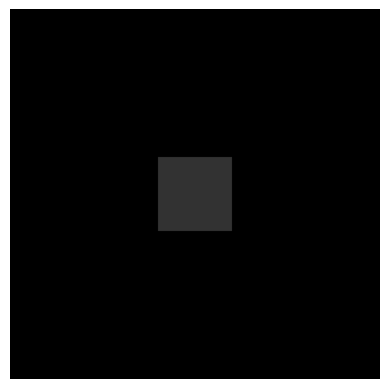

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create a black image
image_size = 250
black_image = np.zeros((image_size, image_size, 3), dtype=np.uint8)

# Add a gray square in the middle
square_size = 50
start_x = (image_size - square_size) // 2
end_x = start_x + square_size
start_y = (image_size - square_size) // 2
end_y = start_y + square_size
black_image[start_y:end_y, start_x:end_x, :] = [50, 50, 50]  # RGB values for gray

# Display the image
plt.imshow(black_image)
plt.axis('off')  # Hide axes
plt.show()


creating a video size 250 250 of a grey square size 50 50 that moves from the up left side to the done right side and display it on google colab

he video file may not be directly viewable in the Colab notebook interface- thar is a way to make it viewable on google colab?

i cant see the video... Do you have another solution?

In [ ]:
!apt-get install ffmpeg

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.


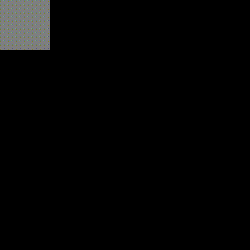

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML, clear_output, Image

# Define video properties
width, height = 250, 250
square_size = 50
frame_rate = 30
duration = 5  # in seconds

# Create a VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
video_path = '/content/moving_square.mp4'
out = cv2.VideoWriter(video_path, fourcc, frame_rate, (width, height))

# Generate frames for the video
for t in np.arange(0, duration, 1/frame_rate):
    # Create a blank frame
    frame = np.zeros((height, width, 3), dtype=np.uint8)

    # Calculate the position of the square
    x = int(t * (width - square_size))
    y = int(t * (height - square_size))

    # Draw the square on the frame
    frame[y:y+square_size, x:x+square_size, :] = 127  # 127 corresponds to grey

    # Write the frame to the video
    out.write(frame)

# Release the VideoWriter
out.release()

# Convert the video to a GIF
gif_path = '/content/moving_square.gif'
!ffmpeg -i $video_path $gif_path -loglevel quiet

# Display the GIF in Colab
display(Image(filename=gif_path))


now I need to write a script that takes the grey moving square and marks it with a red square and prints the middle of the square

almost what i need! bat the display is not working in the Google colab.. can you display the marked video the same way that you display the original one?

no... this is not working... it supposed to be as a gif

Frame 1: Middle coordinates - (25, 25)
Frame 2: Middle coordinates - (31, 31)
Frame 3: Middle coordinates - (38, 38)
Frame 4: Middle coordinates - (45, 45)
Frame 5: Middle coordinates - (51, 51)
Frame 6: Middle coordinates - (58, 58)
Frame 7: Middle coordinates - (65, 65)
Frame 8: Middle coordinates - (71, 71)
Frame 9: Middle coordinates - (78, 78)
Frame 10: Middle coordinates - (85, 85)
Frame 11: Middle coordinates - (91, 91)
Frame 12: Middle coordinates - (98, 98)
Frame 13: Middle coordinates - (105, 105)
Frame 14: Middle coordinates - (111, 111)
Frame 15: Middle coordinates - (118, 118)
Frame 16: Middle coordinates - (125, 125)
Frame 17: Middle coordinates - (131, 131)
Frame 18: Middle coordinates - (138, 138)
Frame 19: Middle coordinates - (145, 145)
Frame 20: Middle coordinates - (151, 151)
Frame 21: Middle coordinates - (158, 158)
Frame 22: Middle coordinates - (165, 165)
Frame 23: Middle coordinates - (171, 171)
Frame 24: Middle coordinates - (178, 178)
Frame 25: Middle coordina

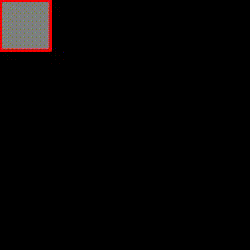

In [ ]:
import cv2
import numpy as np
from IPython.display import display, HTML, clear_output, Image

# Define video properties
width, height = 250, 250
square_size = 50
frame_rate = 30
duration = 5  # in seconds

# Create a VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
video_path = '/content/marked_square.mp4'
out = cv2.VideoWriter(video_path, fourcc, frame_rate, (width, height))

# Generate frames for the video
for t in np.arange(0, duration, 1/frame_rate):
    # Create a blank frame
    frame = np.zeros((height, width, 3), dtype=np.uint8)

    # Calculate the position of the grey square
    x = int(t * (width - square_size))
    y = int(t * (height - square_size))

    # Draw the grey square on the frame
    frame[y:y+square_size, x:x+square_size, :] = 127  # 127 corresponds to grey

    # Draw a red square around the grey square
    cv2.rectangle(frame, (x, y), (x + square_size, y + square_size), (0, 0, 255), 2)  # Red color

    # Print the middle coordinates of the grey square
    middle_x = x + square_size // 2
    middle_y = y + square_size // 2
    print(f"Frame {int(t * frame_rate) + 1}: Middle coordinates - ({middle_x}, {middle_y})")

    # Write the frame to the video
    out.write(frame)

# Release the VideoWriter
out.release()

# Convert the video to a GIF without printing ffmpeg output
gif_path = '/content/marked_square.gif'
!ffmpeg -i $video_path $gif_path -loglevel quiet

# Display the marked video as a GIF in Colab
display(Image(filename=gif_path))
